# Notebook 3: Building the the elastic network

In this note book we are going to build the elastic network model. The steps are as follows
1. Lay points (nodes) down in 2d space to represent the position of each "amino acid". This will be our model's "structure".
2. Connect nodes together by making an adjacency matrix. 

## Step 1: Laying points on a lattice.
#### We will first lay down points on a triangular lattice. A lattice is defined by a set of lattice vectors. For a triangular lattice (2d) the lattice vectors are

#### $u_1 = (\cos \frac{\pi}{6} , \sin \frac{\pi}{6} )$  and  $u_2 = (0,1)$

#### if $a$ and $b$ are integers then all lattice points can be described as, 

#### $ r = a u_1  + b u_2$

#### Let's now write some code!

In [13]:
using PyPlot
u1 = [cos(pi/6), sin(pi/6)]
u2 = [0, 1]

2-element Vector{Int64}:
 0
 1

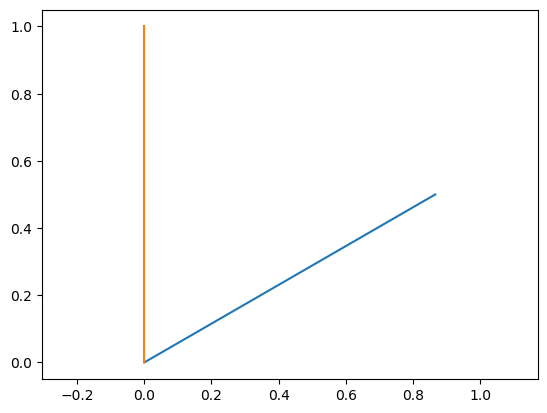

(-0.04330127018922194, 0.9093266739736606, -0.05, 1.05)

In [18]:
# plot u1 and u2
fig, ax = subplots()
ax.plot( [0,u1[1]], [0, u1[2]] )
ax.plot( [0,u2[1]], [0, u2[2]] )
ax.axis("equal")

In [49]:
W  = 10 # width of lattice
L = 10  # length of lattice 
xy = zeros(W*L, 2)
k,c = 0,0
for i in 1:L
    for j in 1:W
        k += 1
        xy[k,:] = i * u1 .+ j * u2
    end
end
xy

100×2 Matrix{Float64}:
 0.866025   1.5
 0.866025   2.5
 0.866025   3.5
 0.866025   4.5
 0.866025   5.5
 0.866025   6.5
 0.866025   7.5
 0.866025   8.5
 0.866025   9.5
 0.866025  10.5
 1.73205    2.0
 1.73205    3.0
 1.73205    4.0
 ⋮         
 7.79423   13.5
 7.79423   14.5
 8.66025    6.0
 8.66025    7.0
 8.66025    8.0
 8.66025    9.0
 8.66025   10.0
 8.66025   11.0
 8.66025   12.0
 8.66025   13.0
 8.66025   14.0
 8.66025   15.0

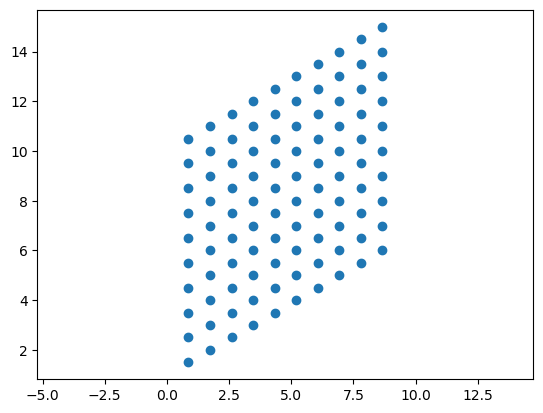

(0.4696607462749896, 9.056618695353837, 0.8160714285714286, 15.683928571428572)

In [53]:
fig, ax = subplots()
scatter(xy[:,1], xy[:,2])
ax.axis("equal")

#### It's a triangular lattice by not exactly the square shape we want. With a small tweek...

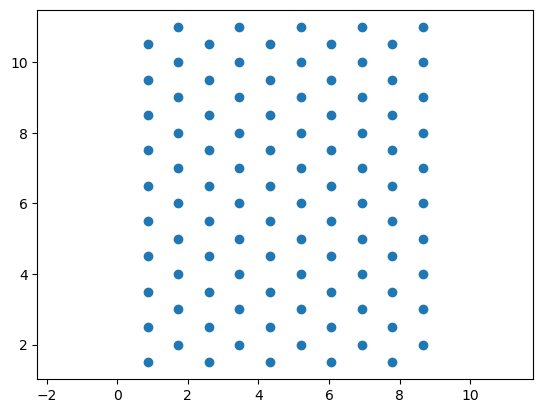

(0.4696607462749896, 9.056618695353837, 1.0160714285714278, 11.483928571428573)

In [54]:
W  = 10 # width of lattice
L = 10  # length of lattice 
xy = zeros(W*L, 2)
k,c = 0,0
for i in 1:L
    for j in 1:W
        k += 1
        b = j + c
        xy[k,:] = i * u1 .+ b * u2
    end
    if i % 2 ==0
        c -= 1
    end 
end

fig, ax = subplots()
scatter(xy[:,1], xy[:,2])
ax.axis("equal")

#### Ah thats better. Now lets wrap it up in a function. Julia is all about breaking code up into many small functions.

In [93]:
function drawLattice(W,L)
    u1 = [cos(pi/6), sin(pi/6)]
    u2 = [0, 1] 
    xy = zeros(W*L, 2)
    k,c = 0,0
    for i in 1:L
        for j in 1:W
            k += 1
            b = j + c
            xy[k,:] = i * u1 .+ b * u2
        end
        if i % 2 ==0
            c -= 1
        end 
    end
    return xy
end
xy = drawLattice(10,10)

100×2 Matrix{Float64}:
 0.866025   1.5
 0.866025   2.5
 0.866025   3.5
 0.866025   4.5
 0.866025   5.5
 0.866025   6.5
 0.866025   7.5
 0.866025   8.5
 0.866025   9.5
 0.866025  10.5
 1.73205    2.0
 1.73205    3.0
 1.73205    4.0
 ⋮         
 7.79423    9.5
 7.79423   10.5
 8.66025    2.0
 8.66025    3.0
 8.66025    4.0
 8.66025    5.0
 8.66025    6.0
 8.66025    7.0
 8.66025    8.0
 8.66025    9.0
 8.66025   10.0
 8.66025   11.0

## Building the adjacency matrix
#### Now lets define how nodes are connected to each other. We do this with an adjacency matrix $A$ whose element are defined as,

#### $A_{ij} = A_{ij} =  1$ if the ith and jth nodes are connected to a spring. \
#### $A_{ij} = 0$ otherwise. 

#### We are going to connect nodes to their nearest neighbors. 

In [62]:
numNodes = W*L
A = zeros(numNodes, numNodes) # initialize a matrix
for i in 1:numNodes
    for j in 1:numNodes
        # compute the distance between nodes i and j
        dx = xy[i,1] - xy[j,1]
        dy = xy[i,2] - xy[j,2]
        dist = sqrt(dx^2 + dy^2)
        if dist < 1.1 # lattice spacing is 1.
            A[i,j] = 1.0
        end
    end
end
A


100×100 Matrix{Float64}:
 1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  1.0  1.0  1.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  1.0  1.0  1.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  1.0  1.0  1.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0

The adjacency matrix is effectively the "contact map" of our protein model.

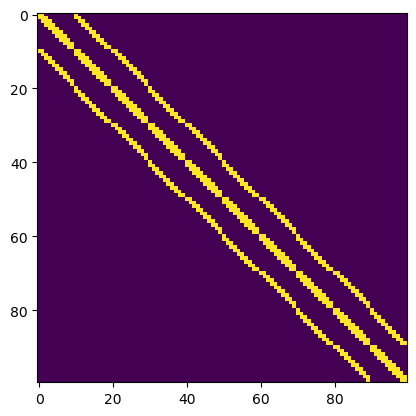

PyObject <matplotlib.image.AxesImage object at 0x7f9f3f5fca90>

In [64]:
imshow(A)

#### Again lets put this code into a function... The julia way.

In [66]:
function buildAdjacency(xy)
    numNodes = size(xy, 1)
    A = zeros(numNodes, numNodes) # initialize a matrix
    for i in 1:numNodes
        for j in 1:numNodes
            # compute the distance between nodes i and j
            dx = xy[i,1] - xy[j,1]
            dy = xy[i,2] - xy[j,2]
            dist = sqrt(dx^2 + dy^2)
            if dist < 1.1 # lattice spacing is 1.
                A[i,j] = 1.0
            end
        end
    end
    return A
end

100×100 Matrix{Float64}:
 1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  1.0  1.0  1.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  1.0  1.0  1.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  1.0  1.0  1.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0

#### Proteins are not lattices, they have a more disordered structure. Lets add some disorder by perturbing each node by a normal random variable.

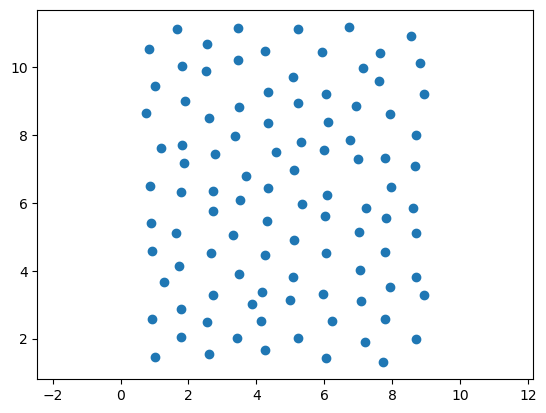

(0.3420822079325506, 9.368056416687772, 0.8017510800003776, 11.687614199157913)

In [76]:
disorder = 0.15
xy .+= disorder .* randn(size(xy))

fig, ax = subplots()
scatter(xy[:,1], xy[:,2])
ax.axis("equal")

#### For the rest of the code we will want to represent the structure not as a matrix xy but as a vector with the following structure

#### $r = (x_1,y_1,x_2,y_2, \dots, x_n,y_n)$

In [78]:
# define two functions that convert a structure in matrix representation to vector and vise versa.
xy2r(xy) = xy'[:]
r2xy(r) = Array(reshape(r, 2, :)')

r2xy (generic function with 1 method)

#### Now we pack all of our work up untill not into another function.

In [79]:
function buildStructure(W,L,disorder)
    # build the structure and adjacency matrix of  
    xy = drawLattice(W,L)
    A = buildAdjacency(xy)
    xy .+= disorder .* randn(size(xy))
    r = xy2r(xy)
    return r, A  
end

buildStructure (generic function with 1 method)

#### When project is more than 100 lines long it is best practice to save all of your function in a module and load that in to you devoplement area.

In [92]:
directoryWithModule = "./src/" # the directory where Elastic.jl is located.
push!(LOAD_PATH, directoryWithModule) # tell julia where to find your code.
using Elastic_N3 # load our module.

┌ Info: Precompiling Elastic_N3 [top-level]
└ @ Base loading.jl:1423
